<a href="https://colab.research.google.com/github/rajagopal17/Text-Analysis-with-Spacy/blob/master/Spacy_rule_matcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', size=14)
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
import csv


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import gensim,pprint
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)
from gensim.models import Phrases
#from gensim.models.word2vec import sentences
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim import corpora, models,similarities
from gensim.models import LdaModel


In [ ]:
from __future__ import unicode_literals
import spacy
from spacy.tokens import doc
from spacy.matcher import Matcher 
from spacy.tokens import Span
from spacy import displacy
nlp=spacy.load('en')
import en_core_web_sm
#nlp=en_core_web_md.load()
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
parser = English()
import string
punctuations=string.punctuation

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

In [ ]:
doc_file3=pd.read_csv('/content/drive/My Drive/Python/Reviews.csv',sep=',', skiprows=1,header=None)
temp_file =doc_file3[9].apply(lambda x: str(x))# this will be used to input to nlp.pipe
temp_nlpfile=temp_file.tolist()
temp_nlpstr =(''.join(x for x in temp_nlpfile))

##Select only the rows which have the word 'coffee'

In [ ]:
titles =doc_file3[doc_file3[9].str.contains('coffee', na=False)]

beverages = titles[9]
bev= (x for x in titles[9])


k=list(((d for d in nlp.pipe(bev,disable=[]))))

j=list([token.label_ for token in docs.ents ] for docs in nlp.pipe(titles[9]))




##Spacy Rule Matcher

In [ ]:
from spacy.matcher import Matcher
matchex=Matcher(nlp.vocab)

In [ ]:
%%time
nlp.max_length=3159999
pattern=[{'LOWER': 'coffee'}]
matchex.add('matched',None, pattern)
myfile=nlp(temp_nlpstr)

CPU times: user 1min 8s, sys: 6.51 s, total: 1min 14s
Wall time: 1min 14s


##Spacy rule matcher- Matcher returns match id,start & end in numeric format. To get the original string pass span.text

In [ ]:
matches = matchex(myfile)
for match_id, start, end in matches:
    matched_span = myfile[start:end]
    #print(matched_span.text)         
    print(matched_span.sent)

you for the personal, incredible service!I have never been a huge coffee fan.
No Coffee Shop has a better one
and I like most of the other products, too (as a usually non-coffee drinker!).<br />The
little Dolche Guesto Machine is super easy to use and prepares a really good Coffee/Latte/Cappuccino/etc in less than a minute (if water is heated up).
MY FRIEND NATE THE OTHER MORNING FOR COFFEE
IT GOES GOOD WITH O.J. AND COFFEE AND A SLICE OF TOAST AND YOUR READY
These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method.
More importantly, the coffee is smooth; no bitter aftertaste.  
I use it to make my own coffee
have to have my coffee blonde and sweet - but the flavored creamers are full of the bad kinds of fat, and honestly, I hate to use manufactured "food" items.  
The non-instant lowfat milk is a little sweeter and tastes fresher than regular instant low-fat milk, but does not dissolve good in cold water - which is not a problem for hot coffee.  
- 

##Function of spacy rule matcher

In [ ]:
def get_match(x):
 matches=matchex(x)
 for match_id,start,end in matches:
  matched_span=x[start:end]
  print(matched_span)

get_match(myfile)

##Apply nlp.pipe on temp_file which is a column of the dataframe converted to string using lambda function

In [ ]:
%%time
clean_data=pd.DataFrame(columns=['lemma_reviews','names','beverages'])
temp_file =doc_file3[9].apply(lambda x: str(x))
lemma_list=list([token.lemma_ for token in doc if token.is_stop==False] for doc in nlp.pipe(temp_file, batch_size=1000,disable='ner'))
names_list=list([token.text for token in doc if token.pos_ =='PROPN'] for doc in nlp.pipe(temp_file, batch_size=1000))
bev_list  =list([token.text for token in doc if token.text=='coffee'] for doc in nlp.pipe(temp_file,disable=['ner']))
adj_list  =list([token.text for token in doc if token.pos_ =='ADJ'] for doc in nlp.pipe(temp_file, batch_size=1000))
clean_data['lemma_reviews']=lemma_list
clean_data['names'] =names_list
clean_data['bevarages']=bev_list
clean_data['beverages']=adj_list
clean_data.head()

CPU times: user 2min 58s, sys: 5.81 s, total: 3min 4s
Wall time: 3min 4s


In [ ]:
clean_data.head(n=30)

,lemma_reviews,names,beverages,bevarages
0,"[buy, Vitality, can, dog, food, product, find,...","[Vitality, Labrador]","[several, good, finicky, better]",[]
1,"[product, arrive, label, Jumbo, salt, peanut, ...","[Jumbo, Jumbo]","[small, sized, unsalted, sure]",[]
2,"[confection, century, ., , light, ,, pillowy,...","[gelatin, heaven, C.S., Lewis, Lion, Witch, Wa...","[few, light, pillowy, tiny, powdered, tiny, fl...",[]
3,"[look, secret, ingredient, Robitussin, believe...","[Robitussin, Root, Beer, Extract]","[secret, good, medicinal]",[]
4,"[great, taffy, great, price, ., , wide, assor...",[Delivery],"[Great, great, wide, yummy, quick]",[]
5,"[get, wild, hair, taffy, order, pound, bag, .,...",[watermelon],"[wild, enjoyable, many, only, much, red, black...",[]
6,"[saltwater, taffy, great, flavor, soft, chewy,...",[Fralinger],"[great, soft, expensive]",[]
7,"[taffy, good, ., , soft, chewy, ., , flavor,...",[],"[good, soft, amazing, satisfying]",[]
8,"[right, sprout, cat, eat, grass, ., love, ., r...","[Wheatgrass, Rye]",[],[]
9,"[healthy, dog, food, ., good, digestion, ., go...",[],"[healthy, Good, good, small, required]",[]


In [ ]:
#import spacy
#nlp = spacy.load('en')

#docs = df['text'].tolist()

#def token_filter(token):
#    return not (token.is_punct | token.is_space | token.is_stop | len(token.text) <= 4)

#filtered_tokens = []
#for doc in nlp.pipe(docs):
    #tokens = [token.lemma_ for token in doc if token_filter(token)]
    #filtered_tokens.append(tokens)

##Function for a rule matcher

In [ ]:
%%time
matchmex=Matcher(nlp.vocab)
pattern = [{'POS': 'NOUN', 'LOWER': 'coffee'}]
matchmex.add('matched',None, pattern)

#########################################

def get_match(x):
 matches=matchmex(x)
 for match_id,start,end in matches:
  matched_span=x[start:end]
  print(matched_span)

#get_match(myfile)


CPU times: user 80 µs, sys: 5 µs, total: 85 µs
Wall time: 87 µs


In [ ]:
doc = nlp(u"had a good texture")
for chunk in doc.noun_chunks:
    print(chunk.text)

a good texture


##Convert a column to a flat list to feed it to a frequency graph

In [ ]:
get_beverages_list=clean_data['names'].tolist()
get_beverages_list

In [ ]:
flat_list=[]
for element in get_beverages_list:
  for item in element:
    flat_list.append(item)

flat_list

In [ ]:
freq = {} 
for items in flat_list: 
    freq[items] = flat_list.count(items) 
print(freq)

{'Vitality': 2, 'Labrador': 1, 'Jumbo': 2, 'gelatin': 1, 'heaven': 13, 'C.S.': 1, 'Lewis': 1, 'Lion': 2, 'Witch': 2, 'Wardrobe': 1, 'Edmund': 3, 'Brother': 3, 'Sisters': 1, 'Robitussin': 2, 'Root': 2, 'Beer': 12, 'Extract': 7, 'Delivery': 1, 'watermelon': 4, 'Fralinger': 1, 'Wheatgrass': 1, 'Rye': 4, 'it.<br': 45, 'Tequila': 2, 'Picante': 2, 'Gourmet': 17, 'de': 15, 'Inclan': 2, 'stale': 5, 'Felidae': 38, 'Platinum': 5, 'Strawberry': 14, 'Twizzlers': 4, 'I.': 3, 'Twizzler': 2, 'Lancaster': 2, 'Pennsylvania': 2, 'Y': 2, 'S': 8, 'Candies': 2, 'Inc.': 7, 'United': 9, 'States': 10, 'Hershey': 13, 'Company': 17, 'Young': 1, 'Smylie': 1, 'Apple': 18, 'Licorice': 15, 'Twists': 3, 'Green': 54, 'Color': 2, 'Blue': 46, 'Raspberry': 6, 'br': 382, '/><br': 439, '/>I': 209, 'Guinness': 2, 'Book': 1, 'Records': 1, 'Twist': 4, 'Feet': 1, 'M': 3, 'Breaking': 1, 'World': 15, 'Record': 1, 'July': 6, 'Kosher': 4, 'Amazon': 734, 'US': 26, 'Mexico': 3, 'door': 1, 'Mum': 1, 'w': 8, 'Latte': 5, 'Macciato': 1

In [ ]:
get_graph_data=pd.DataFrame(list(freq.items()), columns=['name','value'])
get_graph_data.head()

,name,value
0,Vitality,2
1,Labrador,1
2,Jumbo,2
3,gelatin,1
4,heaven,13


In [ ]:
final_df=get_graph_data[get_graph_data['value']>70]
final_df

,name,value
54,br,382
55,/><br,439
56,/>I,209
68,Amazon,734
76,Coffee,93
146,Christmas,84
238,Organic,83
271,Hot,83
277,amazon,81
288,Newman,139


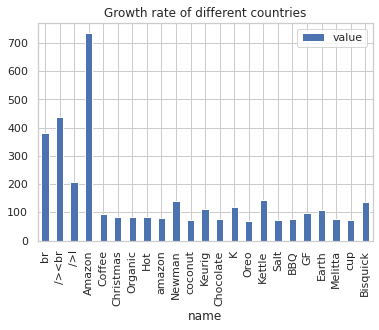

In [ ]:
import matplotlib.pyplot as plot
final_df.plot.bar(x='name', y='value', title="Growth rate of different countries");

plot.show(block=True);

In [ ]:

matchey=Matcher(nlp.vocab)
matched_sets=[]
def callback_method(matchey, doc, i,matches):
  matched_id,start,end=matches[i]
  span=doc[start:end]
  sent=span.sent
  matched_sets.append(sent.text)

callback_method(matchey,myfile,i,matches)
                
                
                

NameError: ignored